### Dataset features:

* survived: 0 = No, 1 = Yes
* pclass: passanger class
* sex
* age (in years)
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of Embarkation:
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

### Importando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import sklearn
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter("ignore")

In [2]:
from bokeh.palettes import Cividis, cividis
from matplotlib.colors import LinearSegmentedColormap
colors = cividis(50)
sns.set_style('darkgrid')
sns.set_palette(colors)
custom_color_map = LinearSegmentedColormap.from_list(name='cividis',colors=colors,)

In [3]:
df = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case idwall/titanic/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Survived'].value_counts()/df['Survived'].value_counts().sum()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

----

Este dataset pode ser considerado desbalanceado? Será que técnicas de oversampling ou undersampling podem melhorar o resultado final do modelo?

----

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----

Estão faltando vários dados de idade, o que pode comprometer o uso dessa variável. O que devemos fazer? 

E o que fazer com os dois valores nulos da variável 'Embarked'? Simplesmente eliminamos ou é melhor usarmos algum imputer?

---

In [9]:
df.duplicated().sum()

0

## Análise exploratória

### Dados gerais

In [10]:
df['Sex'].value_counts()/df['Sex'].value_counts().sum()

male      0.647587
female    0.352413
Name: Sex, dtype: float64

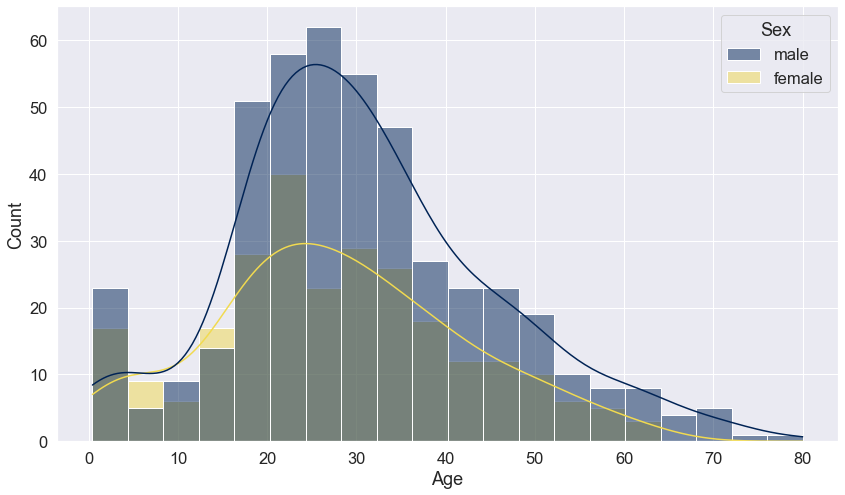

In [11]:
figure = plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.histplot(data=df, x="Age", hue="Sex", kde=True,palette=(colors[1],colors[46]))
plt.show()

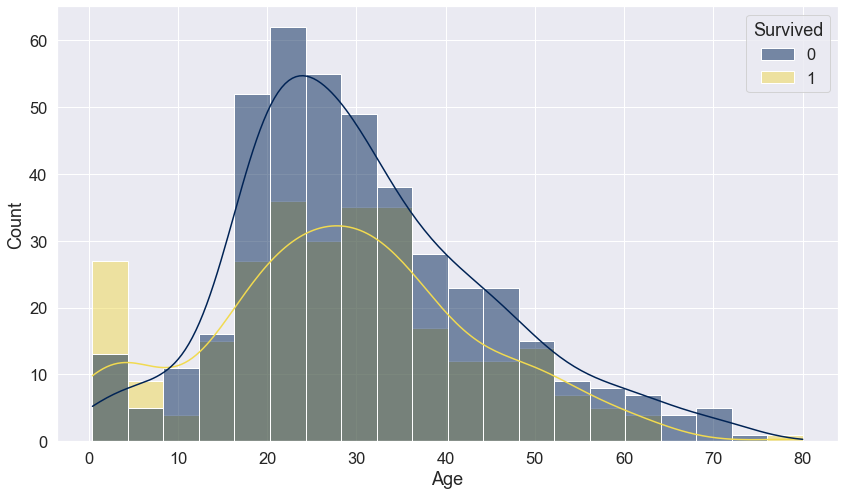

In [12]:
figure = plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.histplot(data=df, x="Age", color="green", hue="Survived", kde=True,palette=(colors[1],colors[46]))
plt.show()

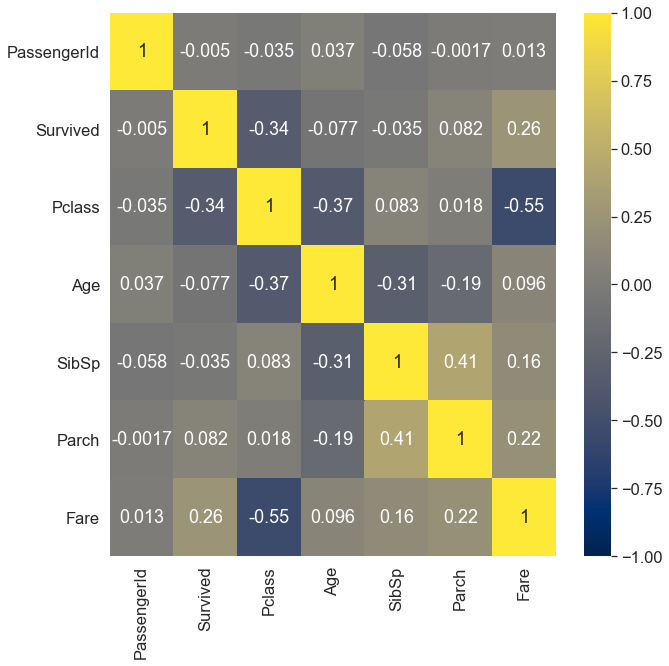

In [13]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(data=df.corr(),annot=True,vmin=-1,cmap='cividis')
plt.show()

---

Correlações que chamam atenção:

1. Preço e Classe da passagem
2. Parch e SibSp
3. Classe da passagem e sobrevivência

---

### Análise das variáveis contínuas - idade e tarifa

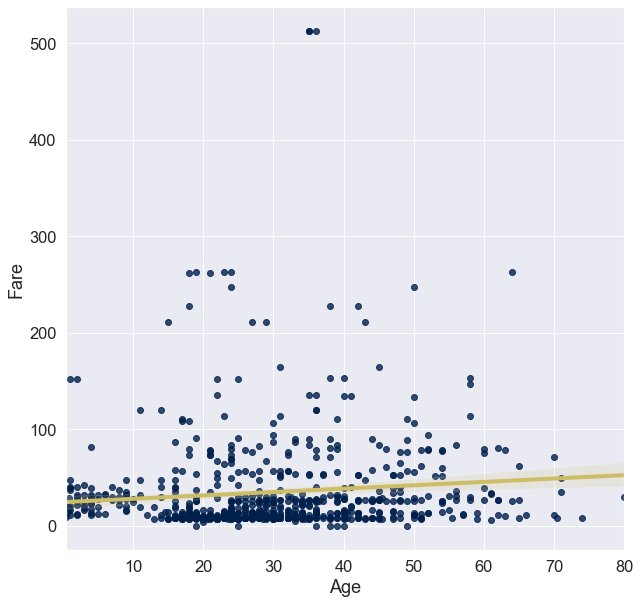

In [14]:
figure = plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.regplot(data=df,x='Age',y='Fare', color=colors[0],line_kws={'linewidth':4,'color':colors[40]})
plt.show()

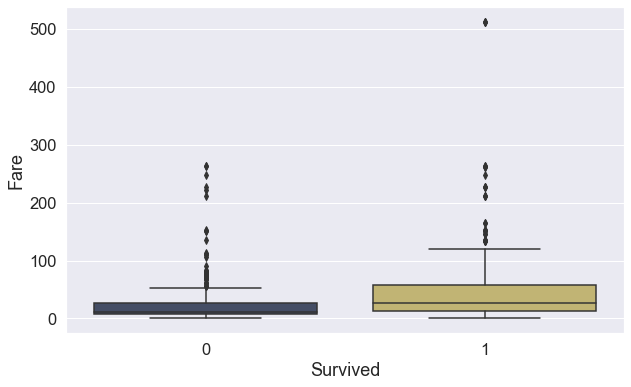

In [15]:
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, y='Fare',x='Survived',palette=(colors[12],colors[40]))
plt.show()

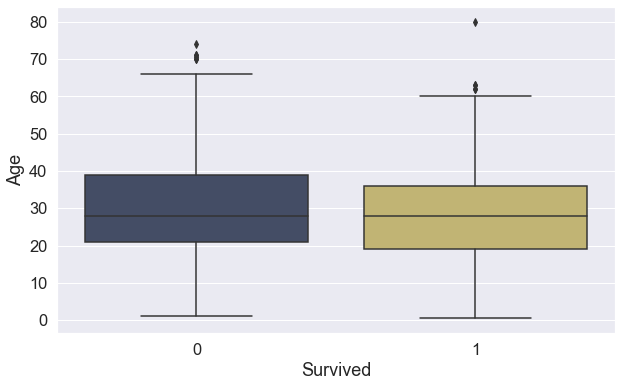

In [16]:
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, y="Age",x='Survived',palette=(colors[12],colors[40]))
plt.show()

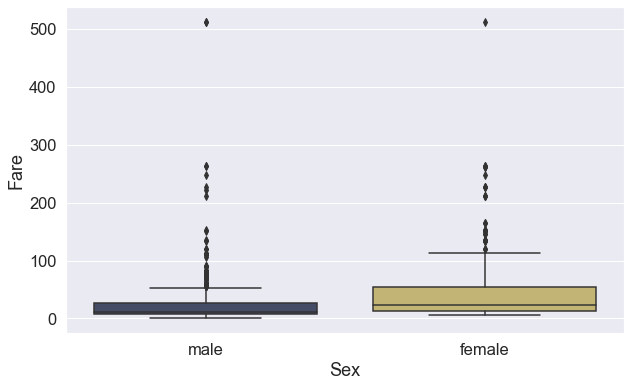

In [17]:
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, y='Fare',x='Sex',palette=(colors[12],colors[40]))
plt.show()

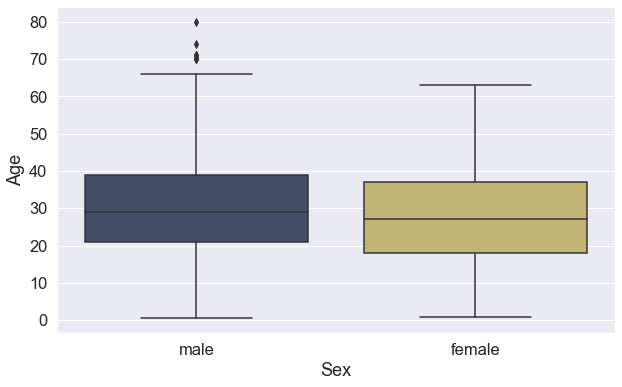

In [18]:
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, y='Age',x='Sex',palette=(colors[12],colors[40]))
plt.show()

### Análise das variáveis categóricas - sexo, classe da passagem, porto de embarque

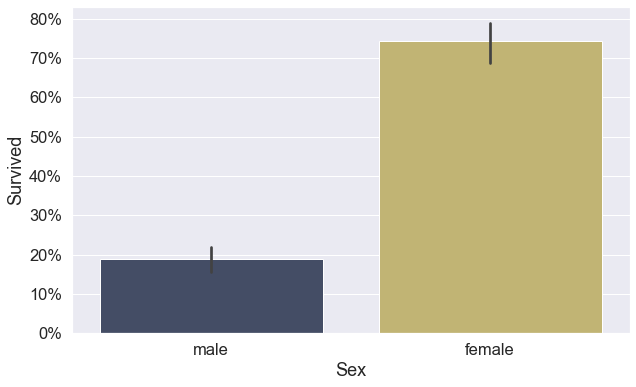

In [19]:
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
ax =sns.barplot(data=df,x='Sex',y='Survived',palette=(colors[12],colors[40]))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

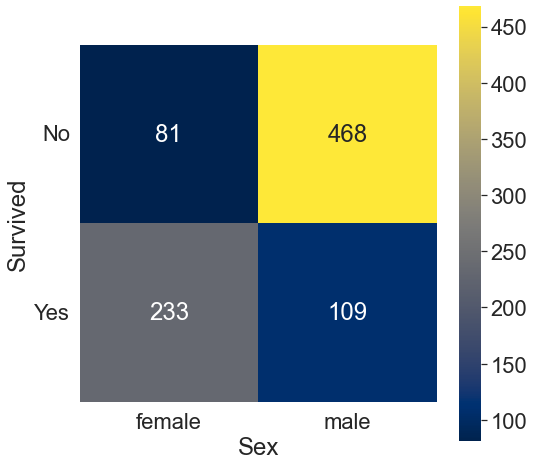

In [20]:
matriz = pd.DataFrame(index=['No','Yes'],columns=['female','male'])
for i in range(2):
    for j in range(2):
        k =2*i+j
        matriz.iloc[i,j] = df[['Survived','Sex']].value_counts().to_frame().reset_index().sort_values(['Survived','Sex']).iloc[k,2]

figure = plt.figure(figsize=(8,8))
sns.set(font_scale=2)
ax = sns.heatmap(data=matriz.astype(int),annot=True,cmap='cividis',fmt='.0f',square=True)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_xlabel("Sex")
ax.set_ylabel("Survived")
plt.show()

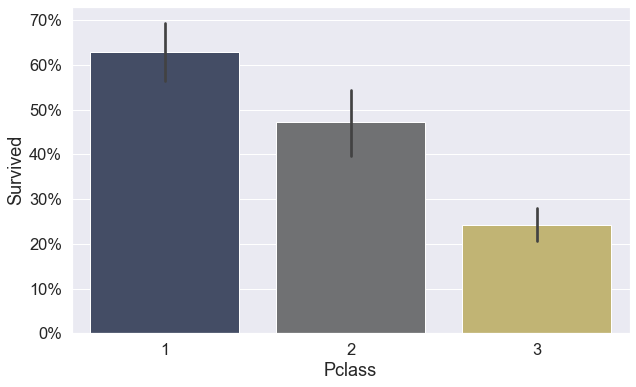

In [21]:
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df,x='Pclass',y='Survived',palette=(colors[12],colors[22],colors[40]))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

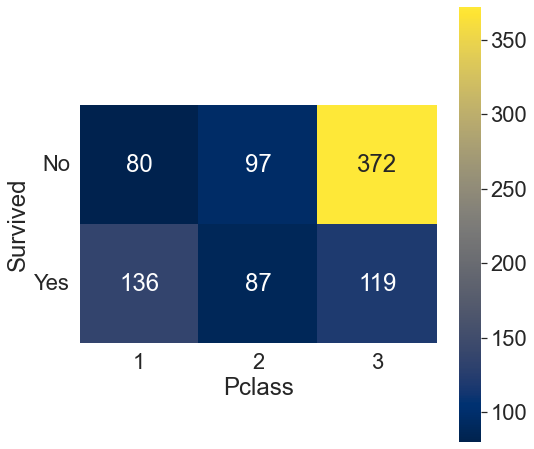

In [22]:
matriz = pd.DataFrame(index=['No','Yes'],columns=['1','2','3'])
for i in range(1,4):
    for j in range(2):
        k=i-1
        matriz.iloc[j,k] = df[['Survived','Pclass']].value_counts()[j][i]
        
figure = plt.figure(figsize=(8,8))
sns.set(font_scale=2)
ax = sns.heatmap(data=matriz.astype(int),annot=True,cmap='cividis',fmt='.0f',square=True)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_xlabel("Pclass")
ax.set_ylabel("Survived")
plt.show()

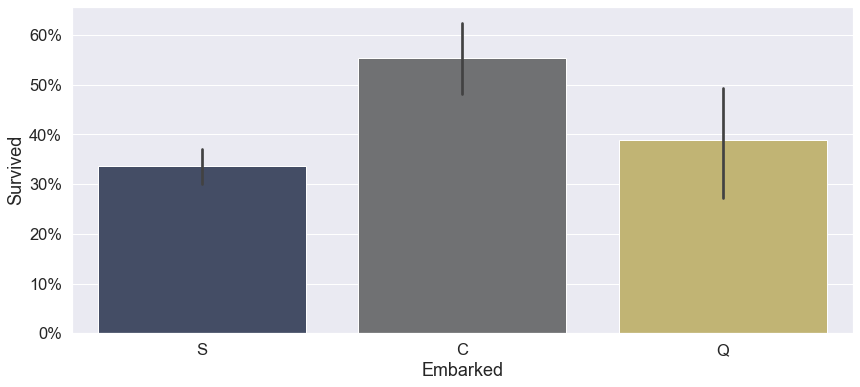

In [23]:
figure = plt.figure(figsize=(14,6))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df,x='Embarked',y='Survived',palette=(colors[12],colors[22],colors[40]))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

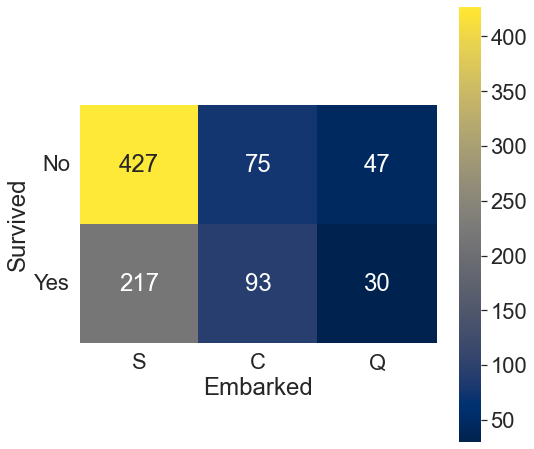

In [24]:
matriz = pd.DataFrame(index=['No','Yes'],columns=['S','C','Q'])
for i in range(3):
    for j in range(2):
        matriz.iloc[j,i] = df[['Survived','Embarked']].value_counts()[j][i]
        
figure = plt.figure(figsize=(8,8))
sns.set(font_scale=2)
ax = sns.heatmap(data=matriz.astype(int),annot=True,cmap='cividis',fmt='.0f',square=True)
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_xlabel("Embarked")
ax.set_ylabel("Survived")
plt.show()

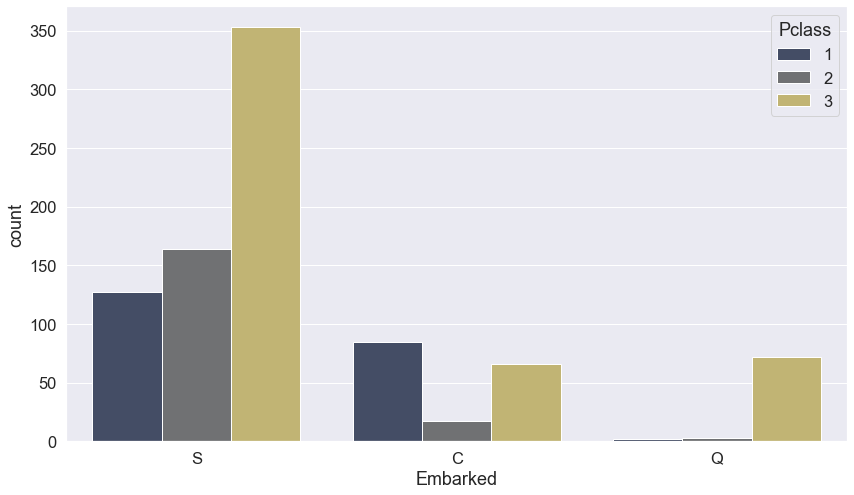

In [25]:
df_plot = df[['Embarked','Pclass']].value_counts().to_frame().reset_index()
df_plot.columns = ['Embarked', 'Pclass', 'count']

figure = plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_plot,x='Embarked',y='count',hue='Pclass',palette=(colors[12],colors[22],colors[40]))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

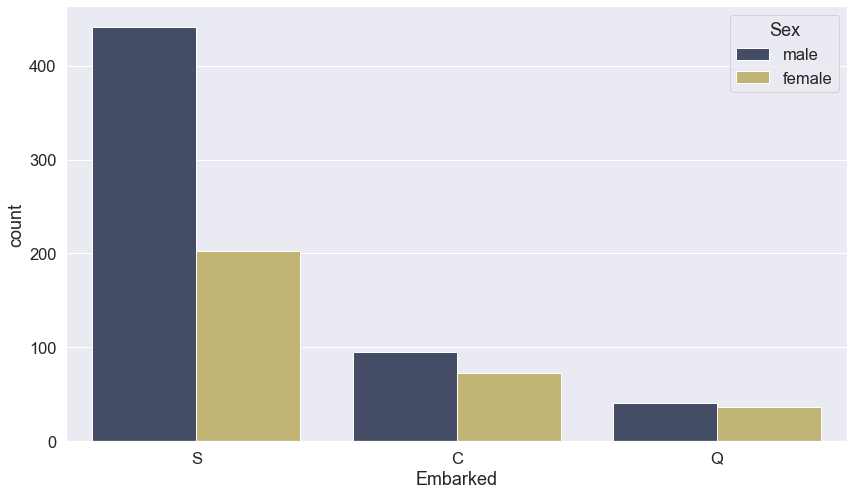

In [26]:
df_plot = df[['Embarked','Sex']].value_counts().to_frame().reset_index()
df_plot.columns = ['Embarked', 'Sex', 'count']

figure = plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_plot,x='Embarked',y='count',hue='Sex',palette=(colors[12],colors[40]))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

### Análise das variáveis categóricas - passageiros com e sem cabine

In [27]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

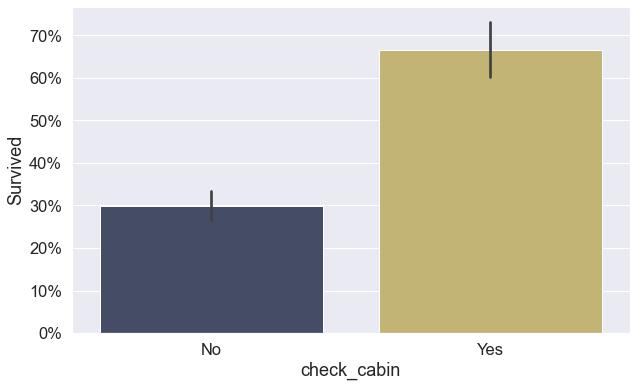

In [28]:
df['check_cabin'] = df['Cabin']

for i in range(len(df['check_cabin'])):
    if pd.isna(df.iloc[i,10]):
        df.iloc[i,12] = 'No'
    else:
        df.iloc[i,12] = 'Yes'
        
figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
ax =sns.barplot(data=df,x='check_cabin',y='Survived',palette=(colors[12],colors[40]))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()

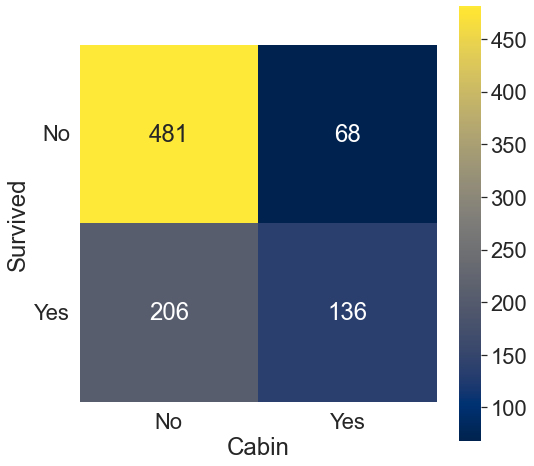

In [29]:
matriz = pd.DataFrame(index=['No','Yes'],columns=['No','Yes'])
for i in range(2):
    for j in range(2):
        k = 2*i+j
        matriz.iloc[i,j] = df[['Survived','check_cabin']].value_counts().reset_index().sort_values('Survived').iloc[k,2]

figure = plt.figure(figsize=(8,8))
sns.set(font_scale=2)
ax=sns.heatmap(data=matriz.astype(int),annot=True,cmap='cividis',fmt='.0f',square=True)
#plt.xticks(np.arange(2)+0.5,rotation=0, fontsize="25", va="center_baseline")
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_xlabel("Cabin")
ax.set_ylabel("Survived")
plt.show()

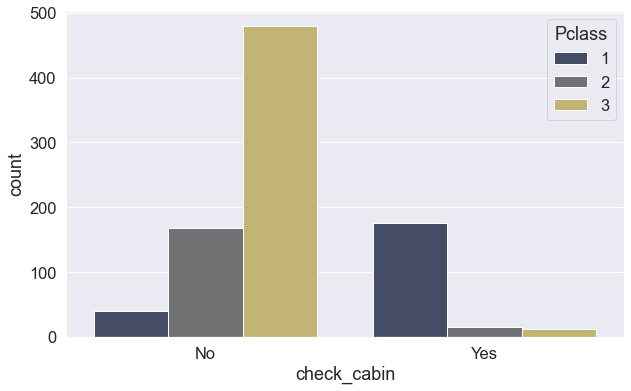

In [30]:
df_plot = df[['check_cabin','Pclass']].value_counts().to_frame().reset_index()
df_plot.columns = ['check_cabin', 'Pclass', 'count']

figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_plot,x='check_cabin',y='count',hue='Pclass',palette=(colors[12],colors[22],colors[40]))
plt.show()

In [31]:
df[(df['check_cabin']=='Yes') & (df['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,check_cabin
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Yes
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Yes
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Yes
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Yes
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Yes
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Yes
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,Yes
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,Yes
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,Yes
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,Yes


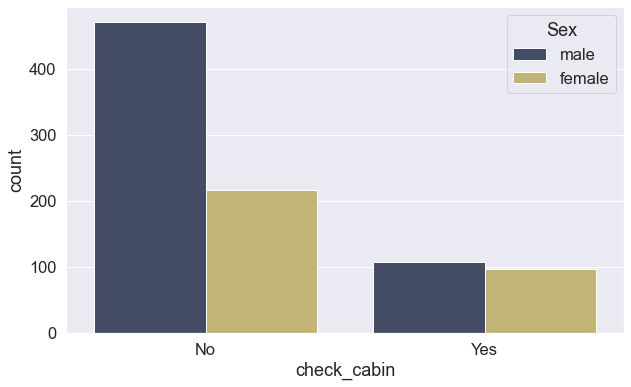

In [32]:
df_plot = df[['check_cabin','Sex']].value_counts().to_frame().reset_index()
df_plot.columns = ['check_cabin', 'Sex', 'count']

figure = plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df_plot,x='check_cabin',y='count',hue='Sex',palette=(colors[12],colors[40]))
plt.show()

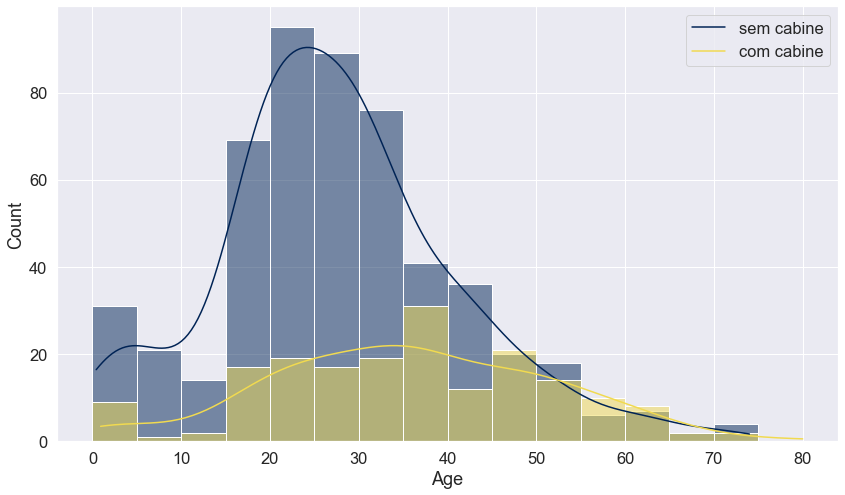

In [33]:
figure = plt.figure(figsize=(14,8))

sns.set(font_scale=1.5)
sns.histplot(data=df[df['check_cabin']=='No']['Age'].to_frame(),x='Age',bins=range(0,80,5),kde=True,color=(colors[1]))
sns.histplot(data=df[df['check_cabin']=='Yes']['Age'].to_frame(),x='Age',bins=range(0,80,5),kde=True,color=(colors[46]))
plt.legend(['sem cabine','com cabine'])
plt.show()

### Análise das variáveis - Identificação de famílias

In [34]:
df['Surname'] = pd.DataFrame(df['Name'].str.split(',').tolist())[0]
df['Surname'].nunique()

667

In [35]:
df[df['Surname']=='Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,check_cabin,Surname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,No,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,No,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,No,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,No,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,No,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,No,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,No,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,No,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,No,Andersson


In [36]:
df[df['Surname']=='Sage']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,check_cabin,Surname
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,No,Sage


In [37]:
df[df['Surname']=='Skoog']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,check_cabin,Surname
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,No,Skoog
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,No,Skoog
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,No,Skoog
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,No,Skoog
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,No,Skoog
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,No,Skoog


---

Como tratar as variáveis categóricas? 

Usar o Label enconder ou o OneHot Enconder?

---

In [38]:
df['Ticket'].nunique()

681

---

Usar ticket + sobrenome para identificar as famílias?

---

### Preparação dos dados para o modelo

In [39]:
df_prep = df.copy()
df_prep['Cabin'] = df_prep['Cabin'].replace(to_replace=np.nan,value='sem cabine')

In [40]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

encoder = LabelEncoder()
surname = encoder.fit_transform(df['Surname'])
ticket = encoder.fit_transform(df['Ticket'])
cabin = encoder.fit_transform(df['Cabin'])
embarked = encoder.fit_transform(df['Embarked'])
enconder2 = LabelBinarizer()
sex = enconder2.fit_transform(df['Sex'])
cabin = enconder2.fit_transform(df['check_cabin'])

In [41]:
df_prep['Surname'] = surname
df_prep['Ticket'] = ticket
df_prep['Sex'] = sex
df_prep['Cabin'] = cabin
df_prep['Embarked'] = embarked
df_prep['check_cabin'] = cabin
df_prep = df_prep.drop(['PassengerId','Name'],axis=1)

In [42]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int64  
 9   Embarked     891 non-null    int64  
 10  check_cabin  891 non-null    int64  
 11  Surname      891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [43]:
df_prep.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,check_cabin,Surname
0,0,3,1,22.0,1,0,523,7.2500,0,2,0,73
1,1,1,0,38.0,1,0,596,71.2833,1,0,1,136
2,1,3,0,26.0,0,0,669,7.9250,0,2,0,251
3,1,1,0,35.0,1,0,49,53.1000,1,2,1,198
4,0,3,1,35.0,0,0,472,8.0500,0,2,0,11


### Construção do modelo

In [44]:
from sklearn.model_selection import train_test_split

df_prep_X = df_prep.drop('Survived',axis=1)
df_prep_y = df_prep['Survived']

df_prep_X_train, df_prep_X_test, df_prep_y_train, df_prep_y_test = train_test_split(df_prep_X, df_prep_y, test_size=0.2,stratify=df_prep_y)

### 1. XGBoost

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

scaler = StandardScaler()
model = XGBClassifier()

steps=[('scaler',scaler),('model',model)]
pipe = Pipeline(steps=steps)

        
pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_train = pipe.predict(df_prep_X_train)

[09:25:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


---

Qual métrica de erro deveríamos utilizar? Acurácia? F1? Outra? Alguma das categorias é mais importante do que a outra para este problema?

---

In [46]:
from sklearn.metrics import accuracy_score, f1_score, fbeta_score

print('Acurácia: %f'% accuracy_score(df_prep_y_train,df_prep_ypred_train))
print('F1-score: %f'% f1_score(df_prep_y_train,df_prep_ypred_train))

Acurácia: 0.998596
F1-score: 0.998172


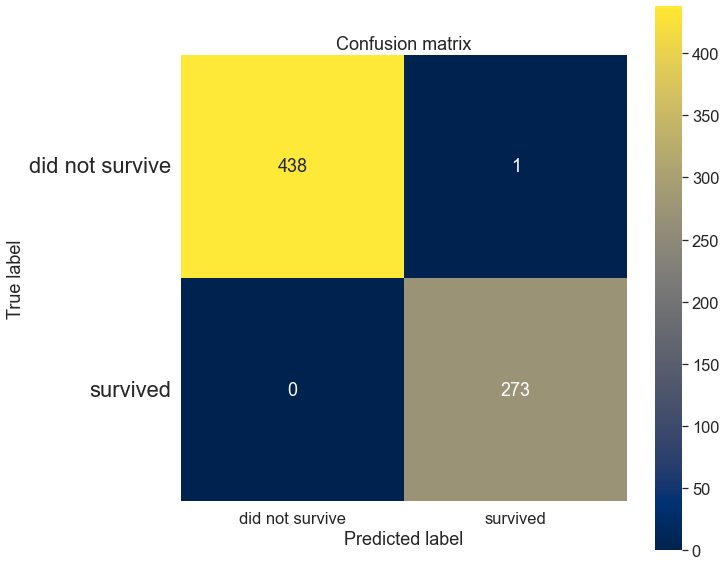

In [47]:
from sklearn.metrics import confusion_matrix

categories = ['did not survive','survived']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_train,df_prep_ypred_train),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

plt.show()

---

Como resolver o overfitting? Usar outro modelo?

---

In [48]:
pd.DataFrame(model.feature_importances_,columns=['importance']).join(df_prep_X_train.columns.to_frame(name='features').reset_index(drop=True)).sort_values('importance',ascending=False)

,importance,features
1,0.450018,Sex
0,0.173754,Pclass
7,0.148960,Cabin
3,0.060568,SibSp
6,0.032902,Fare
2,0.032580,Age
10,0.029885,Surname
5,0.029060,Ticket
4,0.026998,Parch
8,0.015275,Embarked


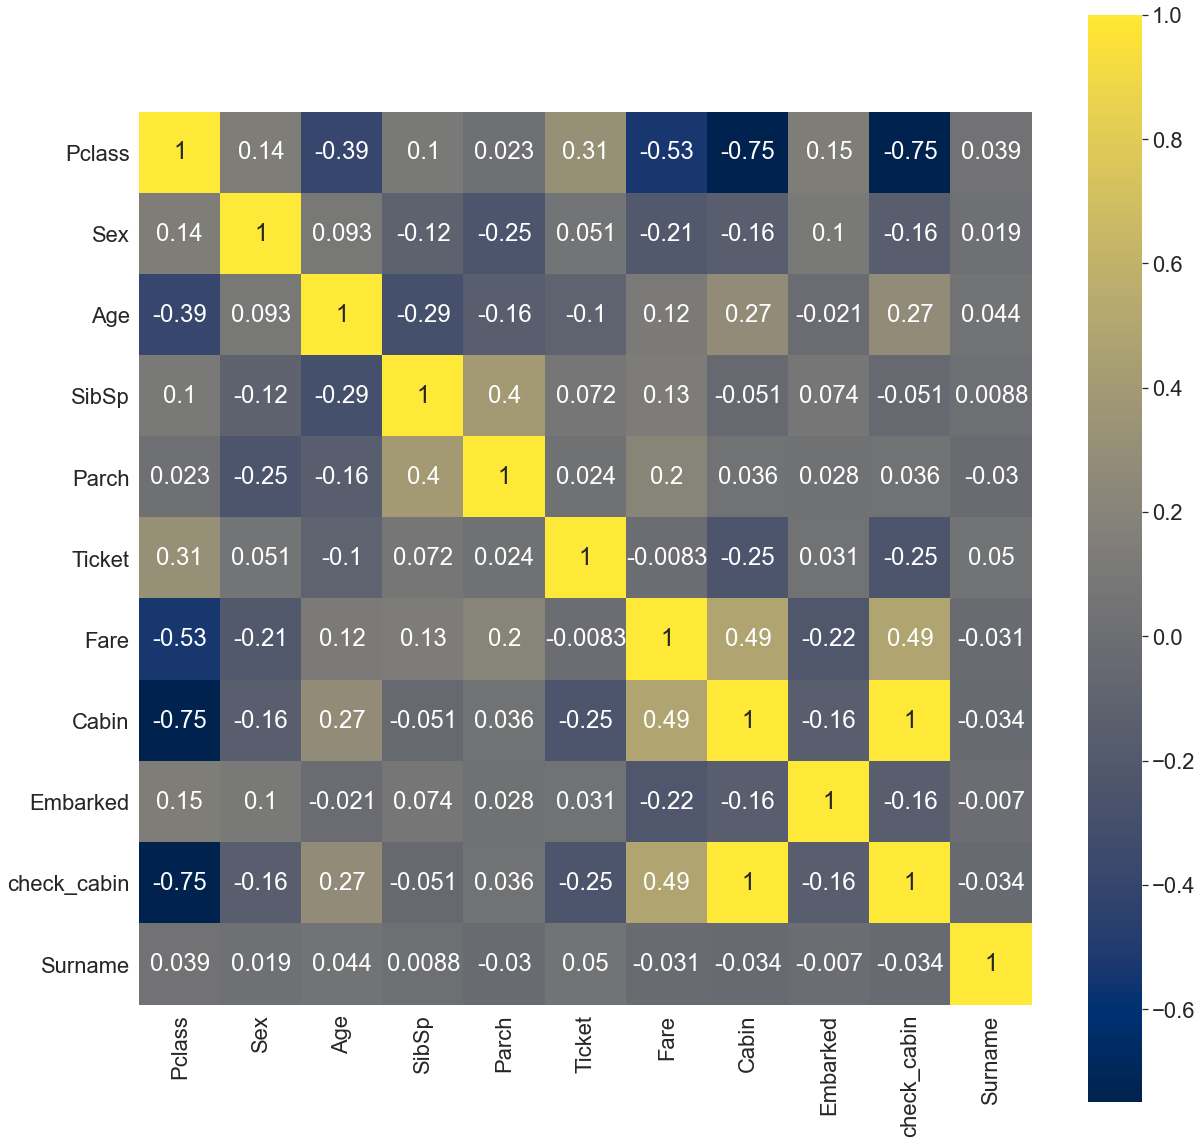

In [49]:
figure = plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(data=df_prep_X_train.corr(),annot=True,cmap='cividis',square=True)
plt.show()

In [50]:
pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_test =pipe.predict(df_prep_X_test)

print('Acurácia: %f'% accuracy_score(df_prep_y_test,df_prep_ypred_test))
print('F1-score: %f'% f1_score(df_prep_y_test,df_prep_ypred_test))

[09:25:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia: 0.793296
F1-score: 0.725926


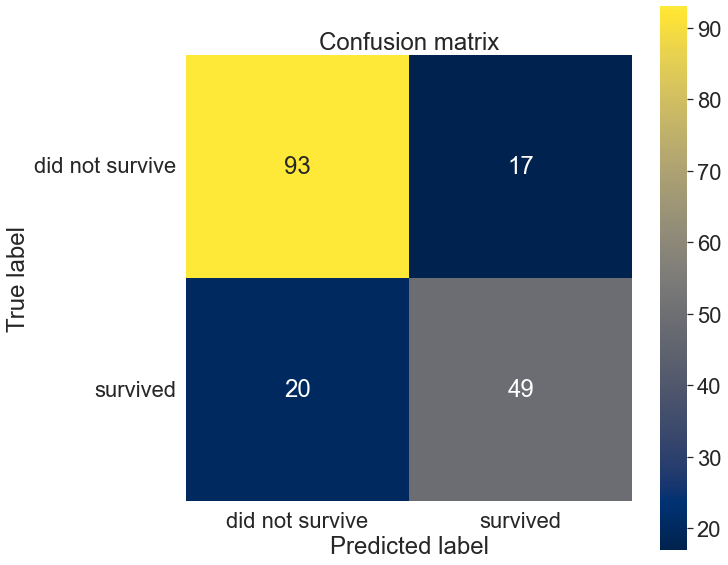

In [51]:
categories = ['did not survive','survived']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_test,df_prep_ypred_test),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

plt.show()

### 2. Catboost

In [52]:
from catboost import CatBoostClassifier

scaler = StandardScaler()
model = CatBoostClassifier(verbose=False)

steps=[('scaler',scaler),('model',model)]
pipe = Pipeline(steps=steps)

pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_train = pipe.predict(df_prep_X_train)

In [53]:
print('Acurácia: %f'% accuracy_score(df_prep_y_train,df_prep_ypred_train))
print('F1-score: %f'% f1_score(df_prep_y_train,df_prep_ypred_train))

Acurácia: 0.946629
F1-score: 0.927203


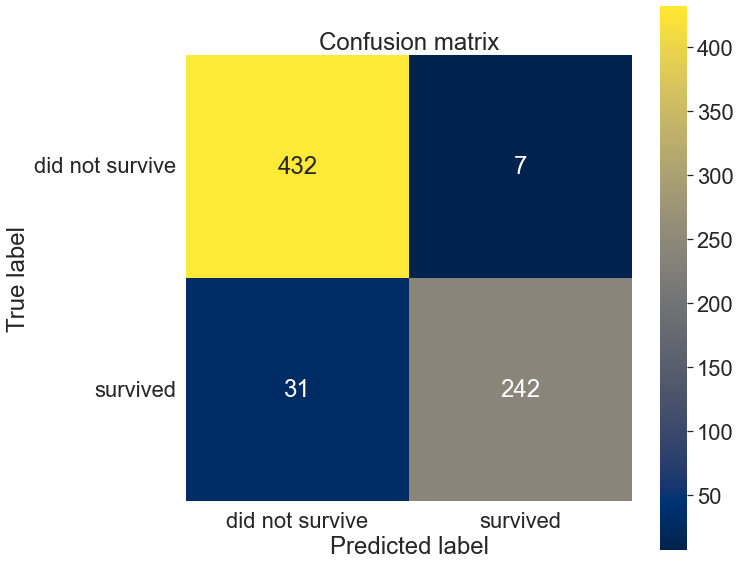

In [54]:
categories = ['did not survive','survived']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_train,df_prep_ypred_train),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

plt.show()

In [55]:
pd.DataFrame(model.feature_importances_,columns=['importance']).join(df_prep_X_train.columns.to_frame(name='features').reset_index(drop=True)).sort_values('importance',ascending=False)

,importance,features
1,25.608645,Sex
10,13.954259,Surname
2,13.707039,Age
5,10.812087,Ticket
6,10.386926,Fare
0,9.142892,Pclass
4,4.774294,Parch
3,3.839184,SibSp
8,3.570839,Embarked
7,2.270111,Cabin


In [56]:
pipe.fit(df_prep_X_train,df_prep_y_train)
df_prep_ypred_test =pipe.predict(df_prep_X_test)

print('Acurácia: %f'% accuracy_score(df_prep_y_test,df_prep_ypred_test))
print('F1-score: %f'% f1_score(df_prep_y_test,df_prep_ypred_test))

Acurácia: 0.826816
F1-score: 0.755906


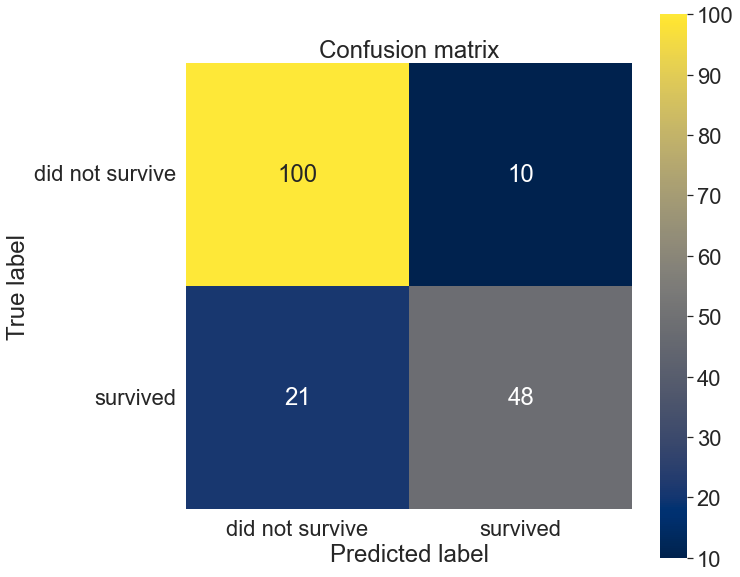

In [57]:
categories = ['did not survive','survived']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_prep_y_test,df_prep_ypred_test),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()

In [58]:
df_cat = df.copy()
df_cat =df_cat.drop(['PassengerId','Name'],axis=1)
df_cat = df_cat.dropna(subset=['Embarked'])
df_cat['Cabin'] = df_cat['Cabin'].replace(to_replace=np.nan,value='sem cabine')

In [59]:
df_cat_X = df_cat.drop('Survived',axis=1)
df_cat_y = df_cat['Survived']

df_cat_X_train, df_cat_X_test, df_cat_y_train, df_cat_y_test = train_test_split(df_cat_X, df_cat_y, test_size=0.2,stratify=df_cat_y)

In [60]:
model = CatBoostClassifier(verbose=False)

cat_features = ['Sex','Ticket','Cabin','Embarked','Surname','check_cabin']

model.fit(df_cat_X_train,df_cat_y_train,cat_features=cat_features)
df_cat_ypred_train = model.predict(df_cat_X_train)

In [61]:
print('Acurácia: %f'% accuracy_score(df_cat_y_train,df_cat_ypred_train))
print('F1-score: %f'% f1_score(df_cat_y_train,df_cat_ypred_train))

Acurácia: 0.918425
F1-score: 0.884921


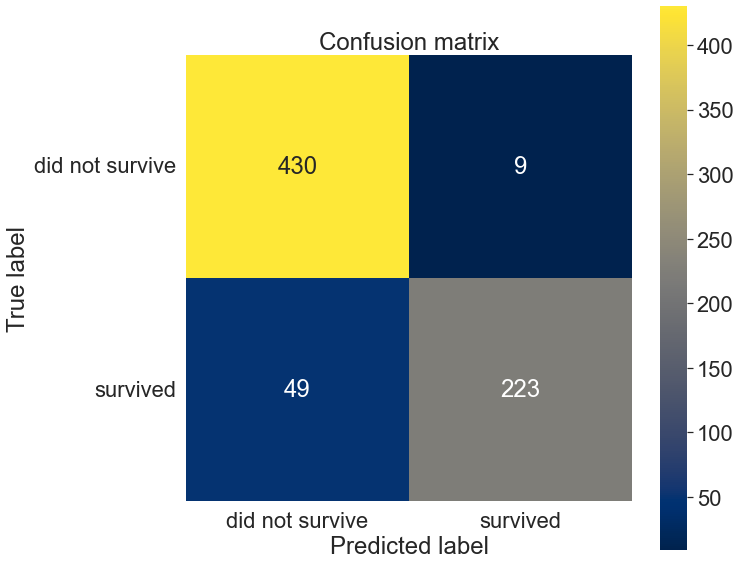

In [62]:
categories = ['did not survive','survived']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_cat_y_train,df_cat_ypred_train),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()

In [63]:
pd.DataFrame(model.feature_importances_,columns=['importance']).join(df_prep_X_train.columns.to_frame(name='features').reset_index(drop=True)).sort_values('importance',ascending=False)

,importance,features
1,32.639847,Sex
2,10.640633,Age
5,10.623780,Ticket
0,9.934412,Pclass
7,8.020120,Cabin
6,7.468114,Fare
8,6.110679,Embarked
10,5.178908,Surname
4,4.674006,Parch
3,2.747652,SibSp


In [64]:
model.fit(df_cat_X_train,df_cat_y_train,cat_features=cat_features)
df_cat_ypred_test = model.predict(df_cat_X_test)
print('Acurácia: %f'% accuracy_score(df_cat_y_test,df_cat_ypred_test))
print('F1-score: %f'% f1_score(df_cat_y_test,df_cat_ypred_test))

Acurácia: 0.853933
F1-score: 0.796875


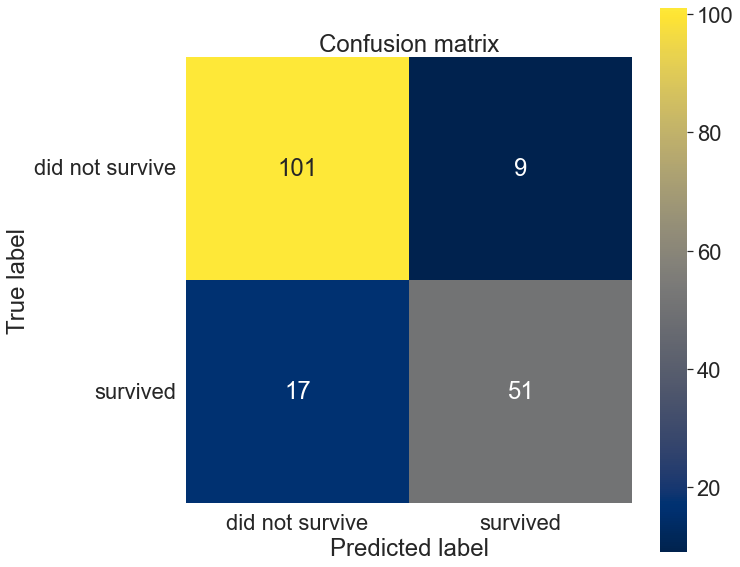

In [65]:
categories = ['did not survive','survived']

figure = plt.figure(figsize=(10,10))
ax = sns.heatmap(data=confusion_matrix(df_cat_y_test,df_cat_ypred_test),
                 annot=True,cmap='cividis',fmt='.0f',square=True,
                 xticklabels=categories,yticklabels=categories)

plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="22", va="center")
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()

---

E agora, que modelo devemos usar? Alguém sugere outro além dos dois testados?

---